# ANALYSIS OF PREMIER LEAGUE DATA FROM 2015/16 TO 2019/20
##### Võ Hửu Nghĩa

 ## I. DATA PROCESSING
 


 IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cufflinks as cf 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, download_plotlyjs,plot,iplot
import plotly.express as px 
cf.go_offline()
init_notebook_mode(connected=True)

 ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS, ĐỒNG THỜI THÊM CỘT YEAR VÀO TỪNG BẢNG VỚI GIÁ TRỊ TƯƠNG ỨNG

In [2]:
pl16 = pd.read_csv('./pl_15-16.csv')
pl17 = pd.read_csv('./pl_16-17.csv')
pl18 = pd.read_csv('./pl_17-18.csv')
pl19 = pd.read_csv('./pl_18-19.csv')
pl20 = pd.read_csv('./pl_19-20.csv')

pl16['Year']='2015/16'
pl17['Year']='2016/17'
pl18['Year']='2017/18'
pl19['Year']='2018/19'
pl20['Year']='2019/20'




KẾT QUẢ 5 DATAFRMATE THÀNH 1 

In [3]:
pl_upto20 = pd.concat([pl16,pl17,pl18,pl19,pl20])

XEM QUA KIỂU DỮ LIỆU VÀ CÁC THUỘC TÍNH BỊ THIẾU DỮ LIỆU 

In [4]:
pl_upto20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4247 entries, 0 to 973
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4247 non-null   int64  
 1   Name                    4247 non-null   object 
 2   Position                4247 non-null   object 
 3   Appearances             4247 non-null   int64  
 4   Clean sheets            1824 non-null   float64
 5   Goals conceded          1824 non-null   float64
 6   Tackles                 3768 non-null   float64
 7   Tackle success %        2883 non-null   object 
 8   Last man tackles        1345 non-null   float64
 9   Blocked shots           3768 non-null   float64
 10  Interceptions           3768 non-null   float64
 11  Clearances              3768 non-null   float64
 12  Headed Clearance        3768 non-null   float64
 13  Clearances off line     1345 non-null   float64
 14  Recoveries              2883 non-null   float6

CHI TIẾT Ý NGHĨA CỦA TỪNG THUỘC TÍNH 

Name: Tên của cầu thủ.

Position: Vị trí chơi bóng của cầu thủ.

Appearances: Số lần xuất hiện trên sân thi đấu.

Clean sheets: Số trận đấu mà thủ môn không để thủng lưới bất kỳ bàn thắng nào.

Goals conceded: Số bàn thắng mà thủ môn đã để cho đối thủ ghi được.

Tackles: Số lần cầu thủ tiến vào tranh chấp bóng.

Tackle success %: Tỷ lệ thành công trong các lần tranh chấp bóng.

Last man tackles: Số lần cầu thủ tranh chấp bóng là người cuối cùng trước khi đối thủ tiến vào khu vực nguy hiểm.

Blocked shots: Số lần cầu thủ cản phá cú sút của đối thủ.

Interceptions: Số lần cầu thủ chặn được đường chuyền hoặc cú sút của đối thủ.

Clearances: Số lần cầu thủ đẩy bóng ra khỏi khu vực nguy hiểm.

Headed Clearance: Số lần cầu thủ đẩy bóng ra khỏi khu vực nguy hiểm bằng đầu.

Clearances off line: Số lần cầu thủ đẩy bóng ra khỏi vạch vôi khi thủ môn đã bị đánh bại.

Recoveries: Số lần cầu thủ giành lại sự kiểm soát bóng sau khi bị mất.

Duels won: Số lần cầu thủ chiến thắng trong các cuộc đối đầu trực tiếp.

Duels lost: Số lần cầu thủ thua trong các cuộc đối đầu trực tiếp.

Successful 50/50s: Số lần cầu thủ chiến thắng trong các tình huống 50/50 (tranh chấp công bằng).

Aerial battles won: Số lần cầu thủ chiến thắng trong các tình huống tranh chấp không gian.

Aerial battles lost: Số lần cầu thủ thua trong các tình huống tranh chấp không gian.

Own goals: Số lượng bàn thắng phản lưới nhà của cầu thủ.

Errors leading to goal: Số lần cầu thủ mắc lỗi dẫn đến bàn thắng của đối thủ.

Assists: Số lần cầu thủ tạo điều kiện để đồng đội ghi bàn.

Passes: Số lần cầu thủ chuyền bóng thành công.

Passes per match: Số lần chuyền bóng trung bình mỗi trận đấu.

Big chances created: Số lượng cơ hội lớn mà cầu thủ tạo ra cho đồng đội ghi bàn.

Crosses: Số lần cầu thủ chuyền bóng từ cánh vào khu vực nguy hiểm.

Cross accuracy %: Tỷ lệ chính xác của các pha chuyền bóng từ cánh vào khu vực nguy hiểm.

Through balls: Số lần cầu thủ chuyền bóng qua hàng phòng ngự đối phương.

Accurate long balls: Số lần cầu thủ chuyền bóng xa thành công.

Yellow cards: Số lần cầu thủ nhận thẻ vàng.

Red cards: Số lần cầu thủ nhận thẻ đỏ.

Fouls: SXin lỗi, tôi đã bị giới hạn không thể hiển thị toàn bộ câu trả lời trong một lần. Dưới đây là phần tiếp theo của các thuộc tính trong tập dữ liệu về bóng đá trên Kaggle:

Fouls: Số lần cầu thủ phạm lỗi.

Offsides: Số lần cầu thủ vi phạm việt vị.

Goals: Tổng số bàn thắng mà cầu thủ ghi được.

Headed goals: Số lượng bàn thắng ghi bằng đầu.

Goals with right foot: Số lượng bàn thắng ghi bằng chân phải.

Goals with left foot: Số lượng bàn thắng ghi bằng chân trái.

Hit woodwork: Số lần cầu thủ sút bóng trúng khung thành nhưng không ghi được bàn.

Goals per match: Số lượng bàn thắng trung bình mỗi trận đấu.

Penalties scored: Số lượng bàn thắng từ quả penalty.

Freekicks scored: Số lượng bàn thắng từ cú sút phạt.

Shots: Tổng số lần cầu thủ sút bóng.

Shots on target: Số lần cầu thủ sút bóng trúng mục tiêu.

Shooting accuracy %: Tỷ lệ chính xác của các cú sút.

Big chances missed: Số lượng cơ hội lớn mà cầu thủ đã không ghi bàn.

Saves: Số lần thủ môn cứu thua.

Penalties saved: Số lượng quả penalty mà thủ môn đã cản phá.

Punches: Số lần thủ môn đấm bóng ra xa khỏi khu vực nguy hiểm.

High Claims: Số lần thủ môn bắt bóng từ các pha tạt vào khu vực nguy hiểm.

Catches: Số lần thủ môn nắm bắt bóng sau các cú sút hoặc chuyền bóng.

Sweeper clearances: Số lần thủ môn đẩy bóng xa khỏi vòng cấm sau các pha phòng ngự.

Throw outs: Số lần thủ môn ném bóng để tiếp tục trò chơi sau khi bắt bóng.

Goal Kicks: Số lần thủ môn đá phạt góc từ vòng cấm.

CHỌN RA 5 CẦU THỦ CÓ SỐ BÀN THẮNG NHIỀU NHẤT TRONG MÙA GIẢI 15-16

<Axes: title={'center': 'Top Goal_scorers - 15/16'}, xlabel='Name', ylabel='Total'>

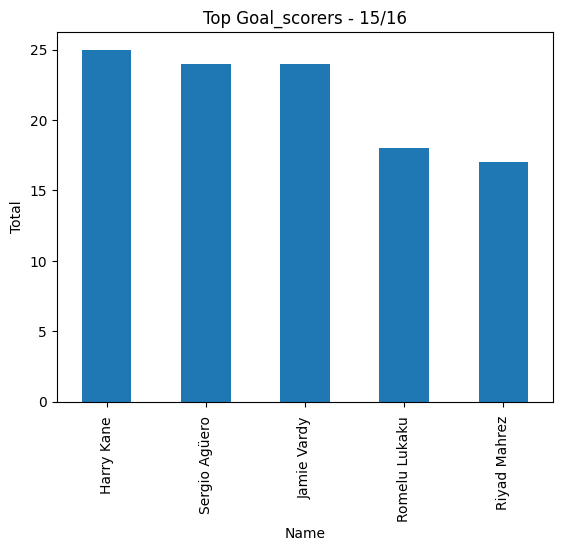

In [5]:
#pl16 = pl16[pl16['Appearances']!=0] ''''Không cần thiết phải loại bỏ các giá trị 0 bởi vì đang lấy danh sách lớn nhất'''
goalscorers = pl16.nlargest(5,"Goals")
goalscorers.plot(kind='bar',x='Name',y='Goals',title='Top Goal_scorers - 15/16',legend=False, xlabel='Name',ylabel='Total')

<Axes: title={'center': 'Top 5 Assists_scorers - 15/16'}, xlabel='Total', ylabel='Name'>

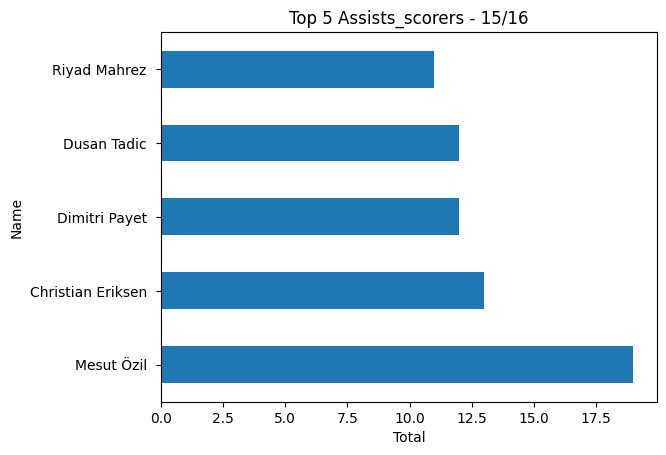

In [6]:
top_5_Assists = pl16.nlargest(5,"Assists")
top_5_Assists.plot(kind='barh',x='Name',y='Assists',title='Top 5 Assists_scorers - 15/16', xlabel='Total',ylabel='Name',legend=False)

TOP 5 CẦU THỦ CÓ TỔNG SỐ BÀN THẮNG + TỔNG SỐ BÀN KIẾN TẠO CAO NHẤT

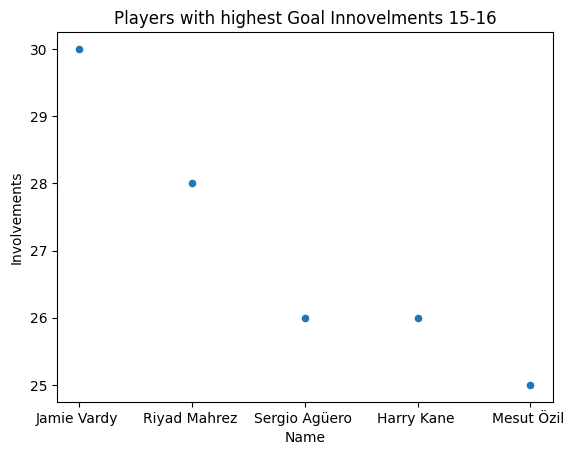

In [7]:
pl16['Involvements'] = pl16['Assists'] + pl16['Goals']
top_5_Involvements = pl16.nlargest(5,'Involvements')
top_5_Involvements.plot(kind='scatter',x='Name', y='Involvements',title='Players with highest Goal Innovelments 15-16',legend=False)
plt.show()

Hiển thị top 10 cầu thủ tiền vệ có lần chặn cú sút nhiều nhất, tiến vào tranh chấp bóng, thắng trong các tình huống tranh chấp

In [8]:
# Không cần tại ra biến Midfielder thì vẫn lọc ra được mà?
midfielder16 = pl16[pl16['Position'] == 'Midfielder']
#kante16 = midfielder16[midfielder16['Name'] == "N'Golo Kante"]
interceptions = midfielder16.nlargest(10, 'Interceptions')[['Name', 'Interceptions']]
duels = midfielder16.nlargest(10, 'Duels won')[['Name','Duels won']]
tackles = midfielder16.nlargest(10,'Tackles')[['Name','Tackles']]

for i in [interceptions,duels,tackles]:
    print(i,"\n")


                Name  Interceptions
367     N'Golo Kante          156.0
285   Idrissa Gueye           141.0
108    Yohan Cabaye           120.0
746   Claudio Yacob           118.0
662   Andrew Surman           109.0
422     Yann M'Vila            86.0
154       Jack Cork            83.0
498      Mark Noble            83.0
115  Etienne Capoue            82.0
191       Eric Dier            80.0 

                  Name  Duels won
285     Idrissa Gueye       295.0
367       N'Golo Kante      277.0
56       Ross Barkley       250.0
184     Mousa Dembélé       249.0
388  Cheikhou Kouyaté       248.0
115    Etienne Capoue       235.0
635    Moussa Sissoko       221.0
92       Robbie Brady       211.0
231       Fernandinho       210.0
154         Jack Cork       209.0 

                   Name  Tackles
367        N'Golo Kante    175.0
285      Idrissa Gueye     144.0
418        Lucas Leiva     108.0
746      Claudio Yacob     108.0
108       Yohan Cabaye     107.0
206  Daniel Drinkwater     1

Hiển thị top 5 cầu thủ hậu về có tỉ lệ tranh chấp bóng thành công cao nhất, đẩy bóng ra khỏi khu vực nguy hiểm + đẩy bóng ra khỏi vạch voi khi thủ môn đã bị đánh bại.

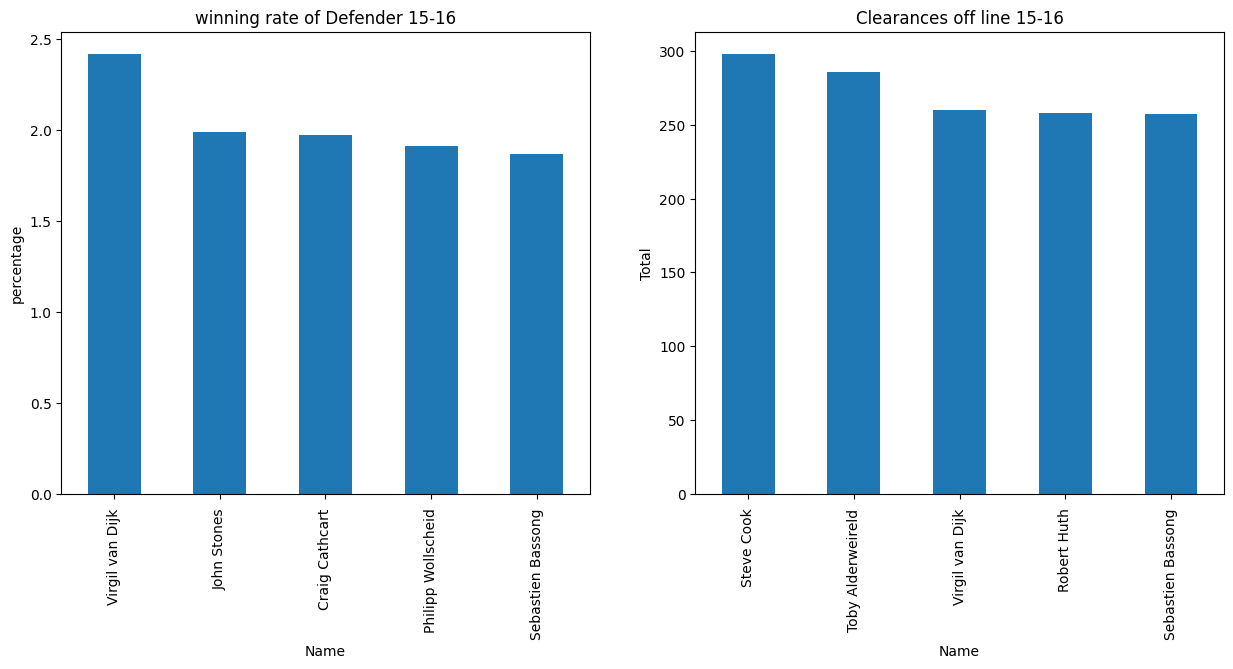

In [9]:
# Tạo một hình ảnh với 1 hàng và 2 cột
fig, ax = plt.subplots(1,2, figsize=(15, 6))
# Lọc ra vị trí hậu vệ
defenders = pl16[pl16['Position']=='Defender']
# Chọn những cầu thủ có tổng số lần ra sân lớn hơn 30
top_defenders_appearances =  defenders[defenders['Appearances']>=30]
# lấy tỉ lệ tranh chấp bóng thành công / thất bại khi đối đầu trực tiếp
top_defenders_appearances['winning rate'] = top_defenders_appearances['Duels won']/top_defenders_appearances['Duels lost']
top_5_duels= top_defenders_appearances.nlargest(5,'winning rate')
# lấy tổng số lần đẩy bóng ra khỏi khu vực nguy hiểm + số lần cản phá khi thủ môn đã bị đánh bại trên vạch voi
top_defenders_appearances['Clear'] = top_defenders_appearances['Clearances'] + top_defenders_appearances['Clearances off line']
top_5_clear = top_defenders_appearances.nlargest(5,'Clear')

# Trực quan hoá
top_5_duels.plot(kind='bar', x='Name', y='winning rate', title='winning rate of Defender 15-16', xlabel='Name',ylabel='percentage',legend=False,ax=ax[0])
top_5_clear.plot(kind='bar',x='Name',y='Clear',title='Clearances off line 15-16',xlabel='Name',ylabel='Total',legend=False,ax=ax[1])
plt.show()




- Có thể thấy rõ hậu vẹ Van Dijk có tỉ lệ tranh chấp bóng thành công là khoảng 2.5 lần . Điều này cho thấy giá trị của hậu vệ trong việc ngăn cản những tình huống tấn công của đối thủ.
- Còn về tổng số lần mà hậu vệ cản phá bóng từ khi vực nguy hiểm cũng như khi thủ môn đã bị đánh bại thì Steve Cook xếp đầu tiên trong mùa giải 15-16

## Liverpool's road to becoming champions!

Đội bóng đã giành chiến thắng trong Champions League vào mùa 2018-2019 và giành chức vô địch Premier League vào mùa 2019-2020.

chúng tôi đã xem xét dữ liệu cho "ba tiền đạo hàng đầu" của Liverpool, đó là Mane, Salah và Firmino, những người đã đóng góp chủ yếu trong việc ghi bàn.

- Lấy thông tin của 3 cầu thủ trên trong 3 mùa giải 2018-19-20 sau đó kết hợp lại thành 1 Dataframe duy nhất.

In [10]:
## Chú ý tên kiểm tra khoảng trắng ở trước và sau tên của cầu thủ. vd:'Mohamed Salah ' khác so với 'Mohamed Salah    ' 


salah18 = pl18[pl18['Name'] == 'Mohamed Salah ']
firmino18 = pl18[pl18['Name'] == 'Roberto Firmino ']
mane18 = pl18[pl18['Name'] == 'Sadio Mané ']

liverpol_trio18 = pd.concat([salah18,firmino18,mane18])

salah19 = pl19[pl19['Name'] == 'Mohamed Salah ']
firmino19 = pl19[pl19['Name'] == 'Roberto Firmino ']
mane19 = pl19[pl19['Name'] == 'Sadio Mané ']

liverpol_trio19 = pd.concat([salah19,firmino19,mane19])


salah20 = pl20[pl20['Name'] ==  'Mohamed Salah ']
firmino20 = pl20[pl20['Name'] == 'Roberto Firmino ']
mane20 = pl20[pl20['Name'] == 'Sadio Mané ']

liverpol_trio20 = pd.concat([salah20,firmino20,mane20])

liverpol_trio = pd.concat([liverpol_trio18,liverpol_trio19,liverpol_trio20])
liverpol_trio



,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Big chances missed,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Year
504,504,Mohamed Salah,Forward,36,NaN,NaN,12.0,NaN,NaN,33.0,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/18
623,623,Roberto Firmino,Forward,37,NaN,NaN,65.0,NaN,NaN,24.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/18
452,452,Sadio Mané,Forward,29,NaN,NaN,28.0,NaN,NaN,13.0,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/18
566,566,Mohamed Salah,Forward,38,NaN,NaN,21.0,NaN,NaN,33.0,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/19
690,690,Roberto Firmino,Forward,34,NaN,NaN,29.0,NaN,NaN,18.0,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/19
509,509,Sadio Mané,Forward,36,NaN,NaN,34.0,NaN,NaN,11.0,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/19
623,623,Mohamed Salah,Forward,34,NaN,NaN,16.0,NaN,NaN,37.0,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019/20
758,758,Roberto Firmino,Forward,38,NaN,NaN,37.0,NaN,NaN,29.0,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019/20
560,560,Sadio Mané,Forward,35,NaN,NaN,44.0,NaN,NaN,11.0,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019/20



		2018

                 Name  Goals
504    Mohamed Salah      32
623  Roberto Firmino      15
452       Sadio Mané      10

		  Total = 57
-----------------------------

		2019

                 Name  Goals
566    Mohamed Salah      22
690  Roberto Firmino      12
509       Sadio Mané      22

		  Total = 56
-----------------------------

		2020

                 Name  Goals
623    Mohamed Salah      19
758  Roberto Firmino       9
560       Sadio Mané      18

		  Total = 46
-----------------------------


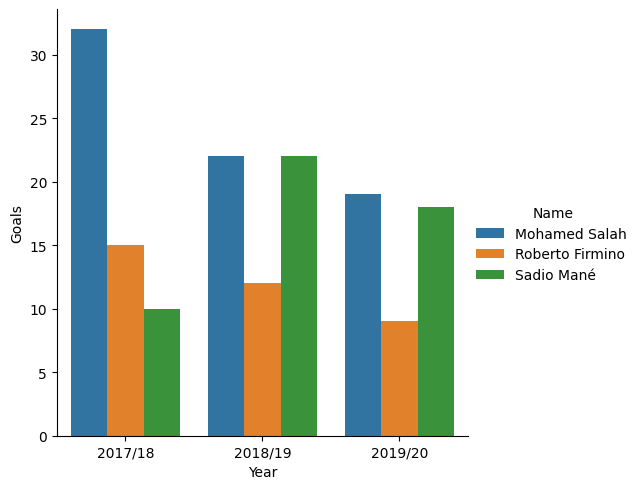

In [11]:
g = sns.catplot(kind='bar',x='Year',y='Goals',hue='Name',data = liverpol_trio)
i =2018
for dfs in [liverpol_trio18,liverpol_trio19,liverpol_trio20]:
    print("\n\t\t{}\n\n{}\n\n\t\t  Total = {}".format(i,dfs[["Name","Goals"]],dfs["Goals"].sum()))
    print("-----------------------------")
    i+=1
print(g)

Phân tích vị trí thủ môn của liverpol mùa 2016-17

In [12]:
mignolet17 = pl17[pl17['Name']=='Simon Mignolet ']
karius17 = pl17[pl17['Name']=='Loris Karius ']

tot_clear_sheets17 = 0
tot_conceded17 = 0

print("\t\t2017-18 Goalkeeper Stats\n\n")
for dfs in [mignolet17,karius17]:
    print("{}".format(dfs[['Name','Appearances','Clean sheets','Goals conceded']]))

    tot_clear_sheets17 += dfs['Clean sheets'].item()
    tot_conceded17  += dfs['Goals conceded'].item()

print("\n\nTotal clear shees = {}\nTotal goals conceded = {}".format(tot_clear_sheets17,tot_conceded17))




		2017-18 Goalkeeper Stats


                Name  Appearances  Clean sheets  Goals conceded
531  Simon Mignolet            28           9.0            30.0
              Name  Appearances  Clean sheets  Goals conceded
413  Loris Karius            10           3.0            12.0


Total clear shees = 12.0
Total goals conceded = 42.0


## QUESTION

1. Top 5 cầu thủ có tổng số bàn thắng và kiến tạo nhiều nhất trong tổng 5 mùa 

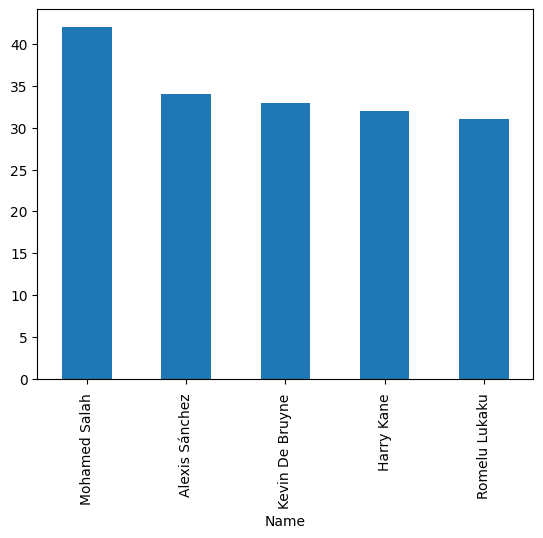

In [41]:
pl_upto20['Total_Goals_and_Assists'] = pl_upto20['Assists']+pl_upto20['Goals']
top_5_Goals_and_Assists = pl_upto20.nlargest(5,'Total_Goals_and_Assists')
top_5_Goals_and_Assists_plot = top_5_Goals_and_Assists.plot(kind='bar',x='Name', y='Total_Goals_and_Assists',legend=False)

